In [33]:
import geopandas as gpd
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Replace 'your_shapefile_path' with the path to your shapefile
gdf = gpd.read_file('../../../data/raw/cb_2018_us_cbsa_500k.shp')
gdf_CT = gpd.read_file('../../../data/raw/cb_2018_us_state_500k.shp')
gdf_CT_census = gpd.read_file('../../../data/raw/cb_2018_09_bg_500k.shp')
gdf_counties = gpd.read_file('../../../data/raw/cb_2018_us_county_500k.shp')
gdf_towns = gpd.read_file('../../../data/raw/Town_Polygon.shp')

# Replace 'population_csv_path' with the path to your population data CSV
population = pd.read_excel('../../../data/raw/pop_towns2022 (1).xlsx')
population = population.iloc[16:185]
population  = population.reset_index(drop=True)
population
population = population.iloc[:, :-2]
new_column_index = ['TOWN', 'Population']

# Assign the new column index directly to the columns attribute
population.columns = new_column_index

In [34]:
#merge data with population
inland_data = gdf_towns[gdf_towns['COASTP_COD'] == 1]
sorted_df = inland_data.sort_values(by='ACREAGE', ascending=False)

# Keep only the first occurrence of each town name (largest ACREAGE)
town_final = sorted_df.drop_duplicates(subset='TOWN', keep='first')
town_final  = town_final.sort_values(by='TOWN')
town_final.reset_index(drop=True, inplace=True)
town_final['TOWN'] = town_final['TOWN'].str.upper()
merged_data = pd.merge(town_final, population, how="left", left_on="TOWN", right_on="TOWN")

In [35]:
COLCHESTER = town_final.loc[town_final['TOWN'] == 'COLCHESTER']
LYME = town_final.loc[town_final['TOWN'] == 'LYME']
OLDLYME = town_final.loc[town_final['TOWN'] == 'OLD LYME']
BRIDGEWATER = town_final.loc[town_final['TOWN'] == 'BRIDGEWATER']
NEWMILFORD = town_final.loc[town_final['TOWN'] == 'NEW MILFORD']

In [36]:
CT_result = gdf_CT[gdf_CT['STUSPS'] == 'CT']
result = gdf[gdf['NAME'].str.contains('CT')]

In [37]:
CT_result = gdf_CT[gdf_CT['STUSPS'] == 'CT']
result = gdf[gdf['NAME'].str.contains('CT')]
result

#extract a single row out as the dataframe
HEM = result.iloc[0:1]
NHM = result.iloc[3:4]
BSN = result.iloc[4:5]

# Load population data for each MSA
NHM_population = 864751  # Replace with actual population data
HEM_population = 1213324  # Replace with actual population data
BSN_population = 956446   # Replace with actual population data

# Merge population data with the GeoDataFrames
NHM['population'] = NHM_population
HEM['population'] = HEM_population
BSN['population'] = BSN_population

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [38]:
#set the county name and heat map for the counties
STATEFP_connecticut = '09'
gdf_connecticut_counties = gdf_counties[gdf_counties['STATEFP'] == STATEFP_connecticut]
rows_to_drop = [661, 1238,1991]
gdf_connecticut_counties.drop(index=rows_to_drop, inplace=True)
target_counties = gdf_connecticut_counties
target_counties['POPULATION'] = [898636,956446,164568,150120,898636]
target_counties

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17552\168835013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_connecticut_counties.drop(index=rows_to_drop, inplace=True)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,POPULATION
56,09,009,00212798,0500000US09009,09009,New Haven,06,1565688367,667081242,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...",898636
659,09,001,00212794,0500000US09001,09001,Fairfield,06,1618651428,549293518,"MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...",956446
660,09,007,00212797,0500000US09007,09007,Middlesex,06,956493754,180679140,"POLYGON ((-72.75294 41.59250, -72.74284 41.594...",164568
1239,09,013,00212668,0500000US09013,09013,Tolland,06,1062807467,17549693,"POLYGON ((-72.51733 41.86990, -72.51692 41.873...",150120
2003,09,003,00212338,0500000US09003,09003,Hartford,06,1903543897,40543777,"POLYGON ((-73.02054 42.00009, -73.00876 42.038...",898636


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17552\776248662.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):


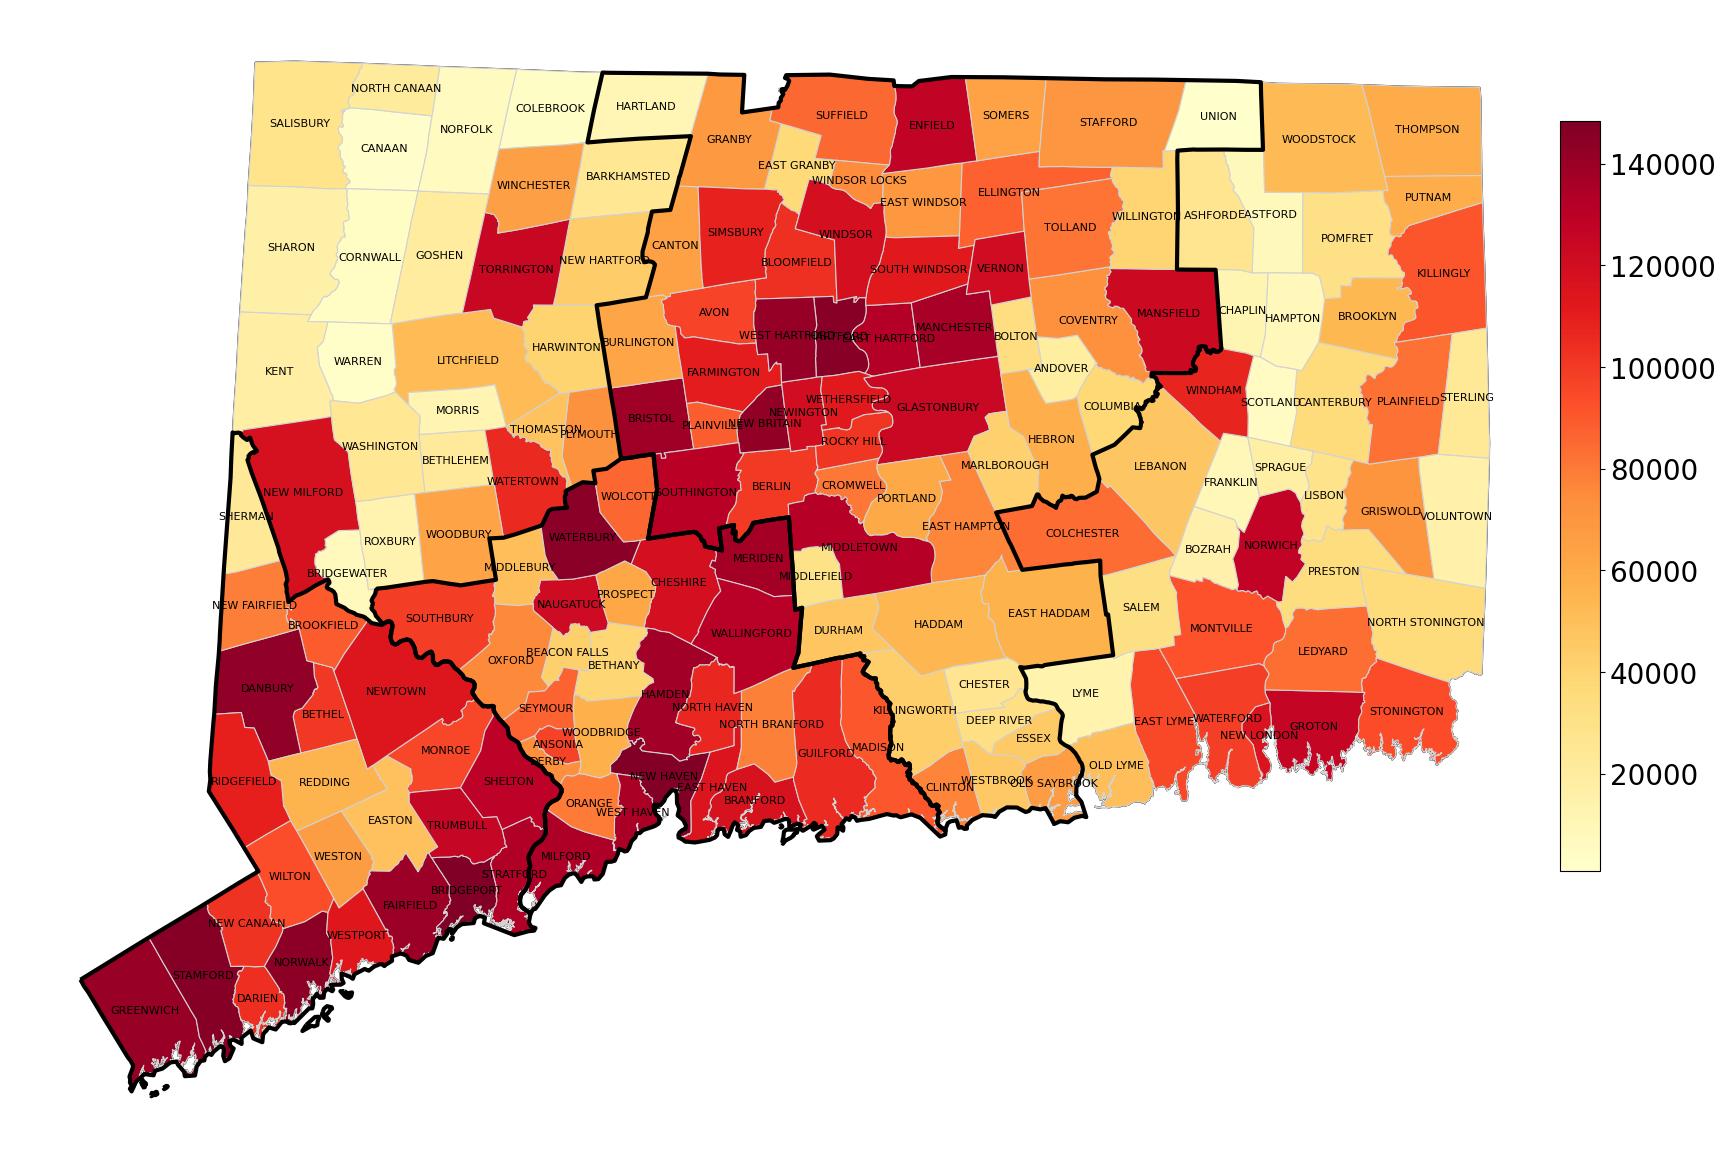

In [39]:
# Plot the heatmap with town boundaries
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()
town_final.plot(ax=ax, color='white', edgecolor='black')  # Plot town boundaries

# Plot the heatmap with adjusted boundary color
merged_data.plot(column='Population', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='lightgray')  # Plot heatmap

# Annotate with town labels
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')
    
# Plot the New Haven-Milford MSA and fill it with a color matching the heatmap
NHM.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#NHM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Plot the Hartford-East Hartford-Middletown MSA, fill it with a color matching the heatmap
HEM.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#HEM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Plot the Bridgeport-Stamford-Norwalk MSA, fill it with a color matching the heatmap
BSN.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#BSN.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Add colorbar
cax = fig.add_axes([0.9, 0.3, 0.02, 0.5])
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=merged_data['Population'].min(), vmax=merged_data['Population'].max()))
sm._A = []
colorbar = fig.colorbar(sm, cax=cax)

colorbar.ax.tick_params(labelsize=20)

#plt.show()
plt.savefig('../../../figures/Report-images/heatmap-CT-population.png',dpi=600, bbox_inches='tight')